# Automating Crypto Website API Pull Using Python

In [1]:
#How to use an API + API Test Notebook

In [13]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'bfc17545-6571-4324-b944-c8a75391d7e5',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter tebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
# If that didn't work try using the local host URL as shown in the video

In [14]:
type(data)

dict

In [15]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [18]:

def api_runner():
    global df #declare as global variable
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'bfc17545-6571-4324-b944-c8a75391d7e5',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter tebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now') #date and time you are running it
    df

    if not os.path.isfile(r'C:\Users\Dell\Desktop\Data Analyst\Python\API.csv'):
        df.to_csv(r'C:\Users\Dell\Desktop\Data Analyst\Python\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Dell\Desktop\Data Analyst\Python\API.csv', mode='a', header=False) #'a' stands for append
        
# If that didn't work try using the local host URL as shown in the video

In [19]:
import os
from time import time
from time import sleep

#this for loop will call api, let us know it has completed the task, wait for 1 minute and then do it again.
for i in range(333):
    api_runner()
    print('API Runner completed') 
    sleep(60) #sleep for 1 minute
exit()   

API Runner completed


KeyboardInterrupt: 

In [21]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11138,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19717706.00000,19717706.00000,False,NaN,1,NaN,NaN,None,2024-06-27T11:49:00.000Z,61214.00336,21518915314.78699,-17.54450,0.16550,-0.21687,-7.47077,-10.42475,-3.40460,-12.76606,1206999721409.99097,53.30050,1285494070639.34009,None,2024-06-27T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 13:50:28.793670
1,1027,Ethereum,ETH,ethereum,9103,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120180875.23514,120180875.23514,True,NaN,2,NaN,NaN,None,2024-06-27T11:48:00.000Z,3402.81047,11684888868.99151,-0.81710,0.19880,0.78592,-5.44008,-12.67829,3.77545,-4.05729,408952740128.49805,18.05940,408952740128.50000,None,2024-06-27T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 13:50:28.793670
2,825,Tether USDt,USDT,tether,90228,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112780783337.50520,116076856624.97296,True,NaN,3,NaN,NaN,None,2024-06-27T11:48:00.000Z,0.99899,43353307137.83649,-10.14870,-0.00075,-0.05950,-0.05803,0.00319,-0.07290,-0.11912,112667429080.59047,4.97620,115960189534.73000,None,2024-06-27T11:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-27 13:50:28.793670
3,1839,BNB,BNB,bnb,2187,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583394.81416,147583394.81416,False,NaN,4,NaN,NaN,None,2024-06-27T11:48:00.000Z,572.72149,1578616046.41350,3.21780,0.09344,-0.10975,-5.27255,-4.75984,-5.15041,-6.95064,84524181187.54634,3.73260,84524181187.55000,None,2024-06-27T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 13:50:28.793670
4,5426,Solana,SOL,solana,694,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462240138.66092,578921186.82795,True,NaN,5,NaN,NaN,None,2024-06-27T11:48:00.000Z,139.07985,1494712744.41594,-25.53290,0.24984,1.71788,-0.24360,-17.66344,-1.60842,-25.12478,64288287512.97842,2.83900,80516269776.92999,None,2024-06-27T11:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 13:50:28.793670
5,3408,USDC,USDC,usd-coin,20411,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32928927124.53524,32928927124.53524,False,NaN,6,NaN,NaN,None,2024-06-27T11:48:00.000Z,0.99987,4977492693.23409,-8.93250,0.00342,-0.00405,-0.00816,-0.01417,-0.02950,-0.01204,32924543348.20127,1.45420,32924543348.20000,None,2024-06-27T11:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-27 13:50:28.793670
6,52,XRP,XRP,xrp,1345,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55688327582.00000,99987490594.00000,False,NaN,7,NaN,NaN,None,2024-06-27T11:49:00.000Z,0.47011,829492871.82493,-4.14750,0.35115,-0.45885,-6.08872,-11.36855,-9.08755,-25.32209,26179732250.47079,1.15630,47011166230.34000,None,2024-06-27T11:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-27 13:50:28.793670
7,11419,Toncoin,TON,toncoin,442,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2459619688.94061,5108172252.91054,True,NaN,8,3414166606.00000,26297067544.61983,None,2024-06-27T11:48:00.000Z,7.70234,240123689.29771,-10.93420,0.33708,3.16321,6.45399,19.45643,42.41589,55.94821,18944823893.61996,0.83660,39344872780.45000,None,2

In [25]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [26]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.16550,-0.21687,-7.47077,-10.42475,-3.40460,-12.76606
Ethereum,0.19880,0.78592,-5.44008,-12.67829,3.77545,-4.05729
Tether USDt,-0.00075,-0.05950,-0.05803,0.00319,-0.07290,-0.11912
BNB,0.09344,-0.10975,-5.27255,-4.75984,-5.15041,-6.95064
Solana,0.24984,1.71788,-0.24360,-17.66344,-1.60842,-25.12478
USDC,0.00342,-0.00405,-0.00816,-0.01417,-0.02950,-0.01204
XRP,0.35115,-0.45885,-6.08872,-11.36855,-9.08755,-25.32209
Toncoin,0.33708,3.16321,6.45399,19.45643,42.41589,55.94821
Dogecoin,0.07749,-1.29585,-3.47448,-26.02103,-17.50748,-42.79774


In [27]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.16550
             quote.USD.percent_change_24h    -0.21687
             quote.USD.percent_change_7d     -7.47077
             quote.USD.percent_change_30d   -10.42475
             quote.USD.percent_change_60d    -3.40460
             quote.USD.percent_change_90d   -12.76606
Ethereum     quote.USD.percent_change_1h      0.19880
             quote.USD.percent_change_24h     0.78592
             quote.USD.percent_change_7d     -5.44008
             quote.USD.percent_change_30d   -12.67829
             quote.USD.percent_change_60d     3.77545
             quote.USD.percent_change_90d    -4.05729
Tether USDt  quote.USD.percent_change_1h     -0.00075
             quote.USD.percent_change_24h    -0.05950
             quote.USD.percent_change_7d     -0.05803
             quote.USD.percent_change_30d     0.00319
             quote.USD.percent_change_60d    -0.07290
             quote.USD.percent_change_90

In [28]:
type(df3)

pandas.core.frame.DataFrame

In [29]:
type(df4)

pandas.core.series.Series

In [30]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.16550
            quote.USD.percent_change_24h  -0.21687
            quote.USD.percent_change_7d   -7.47077
            quote.USD.percent_change_30d -10.42475
            quote.USD.percent_change_60d  -3.40460
            quote.USD.percent_change_90d -12.76606
Ethereum    quote.USD.percent_change_1h    0.19880
            quote.USD.percent_change_24h   0.78592
            quote.USD.percent_change_7d   -5.44008
            quote.USD.percent_change_30d -12.67829
            quote.USD.percent_change_60d   3.77545
            quote.USD.percent_change_90d  -4.05729
Tether USDt quote.USD.percent_change_1h   -0.00075
            quote.USD.percent_change_24h  -0.05950
            quote.USD.percent_change_7d   -0.05803
            quote.USD.percent_change_30d   0.00319
            quote.USD.percent_change_60d  -0.07290
            quote.USD.percent_change_90d  -0.11912
BNB         quote.USD.percent_change_1h    0.09344
            quote.USD.percent_change_24h  -0.10975
            quote.USD.percent_change_7d   -5.27255
            quote.USD.percent_change_30d  -4.75984
            quote.USD.percent_change_60d  -5.15041
            quote.USD.percent_change_90d  -6.95064
Solana      quote.USD.percent_change_1h    0.24984
            quote.USD.percent_change_24h   1.71788
            quote.USD.percent_change_7d   -0.24360
            quote.USD.percent_change_30d -17.66344
            quote.USD.percent_change_60d  -1.60842
            quote.USD.percent_change_90d -25.12478
USDC        quote.USD.percent_change_1h    0.00342
            quote.USD.percent_change_24h  -0.00405
            quote.USD.percent_change_7d   -0.00816
            quote.USD.percent_change_30d  -0.01417
            quote.USD.percent_change_60d  -0.02950
            quote.USD.percent_change_90d  -0.01204
XRP         quote.USD.percent_change_1h    0.35115
            quote.USD.percent_change_24h  -0.45885
            quote.USD.percent_change_7d   -6.08872
            quote.USD.percent_change_30d -11.36855
            quote.USD.percent_change_60d  -9.08755
            quote.USD.percent_change_90d -25.32209
Toncoin     quote.USD.percent_change_1h    0.33708
            quote.USD.percent_change_24h   3.16321
            quote.USD.percent_change_7d    6.45399
            quote.USD.percent_change_30d  19.45643
            quote.USD.percent_change_60d  42.41589
            quote.USD.percent_change_90d  55.94821
Dogecoin    quote.USD.percent_change_1h    0.07749
            quote.USD.percent_change_24h  -1.29585
            quote.USD.percent_change_7d   -3.47448
            quote.USD.percent_change_30d -26.02103
            quote.USD.percent_change_60d -17.50748
            quote.USD.percent_change_90d -42.79774
Cardano     quote.USD.percent_change_1h    0.12613
            quote.USD.percent_change_24h  -1.91608
            quote.USD.percent_change_7d   -3.45074
            quote.USD.percent_change_30d -17.10326
            quote.USD.percent_change_60d -18.83043
            quote.USD.percent_change_90d -41.75244
TRON        quote.USD.percent_change_1h    0.04242
            quote.USD.percent_change_24h  -1.05479
            quote.USD.percent_change_7d    5.35776
            quote.USD.percent_change_30d  10.26580
            quote.USD.percent_change_60d   1.36150
            quote.USD.percent_change_90d   2.42783
Avalanche   quote.USD.percent_change_1h   -0.30953
            quote.USD.percent_change_24h   1.93256
            quote.USD.percent_change_7d   -6.42764
            quote.USD.percent_change_30d -28.44645
            quote.USD.percent_change_60d -22.67072
            quote.USD.percent_change_90d -50.57467
Shiba Inu   quote.USD.percent_change_1h    0.23416
            quote.USD.percent_change_24h  -1.46059
            quote.USD.percent_change_7d   -8.28541
            quote.USD.percent_change_30d -32.64999
            quote.USD.percent_change_60d -29.88561
            quo

In [31]:
type(df)

pandas.core.frame.DataFrame

In [32]:
df5.count()

values    90
dtype: int64

In [35]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.16550
1,Bitcoin,quote.USD.percent_change_24h,-0.21687
2,Bitcoin,quote.USD.percent_change_7d,-7.47077
3,Bitcoin,quote.USD.percent_change_30d,-10.42475
4,Bitcoin,quote.USD.percent_change_60d,-3.40460
5,Bitcoin,quote.USD.percent_change_90d,-12.76606
6,Ethereum,quote.USD.percent_change_1h,0.19880
7,Ethereum,quote.USD.percent_change_24h,0.78592
8,Ethereum,quote.USD.percent_change_7d,-5.44008
9,Ethereum,quote.USD.percent_change_30d,-12.67829


In [46]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.16550
1,Bitcoin,quote.USD.percent_change_24h,-0.21687
2,Bitcoin,quote.USD.percent_change_7d,-7.47077
3,Bitcoin,quote.USD.percent_change_30d,-10.42475
4,Bitcoin,quote.USD.percent_change_60d,-3.40460
5,Bitcoin,quote.USD.percent_change_90d,-12.76606
6,Ethereum,quote.USD.percent_change_1h,0.19880
7,Ethereum,quote.USD.percent_change_24h,0.78592
8,Ethereum,quote.USD.percent_change_7d,-5.44008
9,Ethereum,quote.USD.percent_change_30d,-12.67829


In [48]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7


,name,percent_change,values
0,Bitcoin,1h,0.16550
1,Bitcoin,24h,-0.21687
2,Bitcoin,7d,-7.47077
3,Bitcoin,30d,-10.42475
4,Bitcoin,60d,-3.40460
5,Bitcoin,90d,-12.76606
6,Ethereum,1h,0.19880
7,Ethereum,24h,0.78592
8,Ethereum,7d,-5.44008
9,Ethereum,30d,-12.67829


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

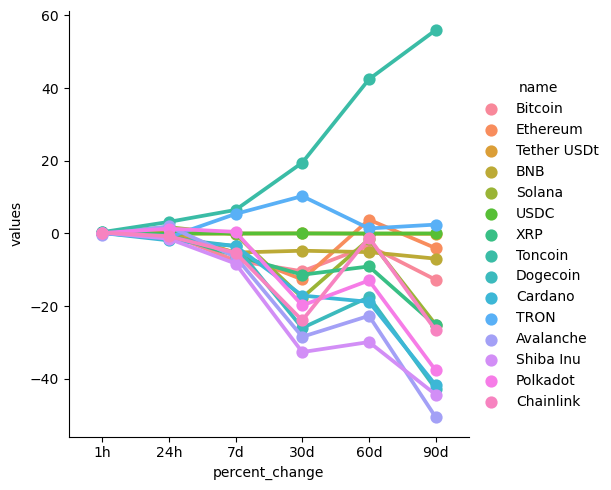

In [56]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [71]:
df10 = df[['name', 'quote.USD.price', 'timestamp']].query("name == 'TRON'")
df10

,name,quote.USD.price,timestamp
10,TRON,0.12298,2024-06-27 13:50:28.793670


C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

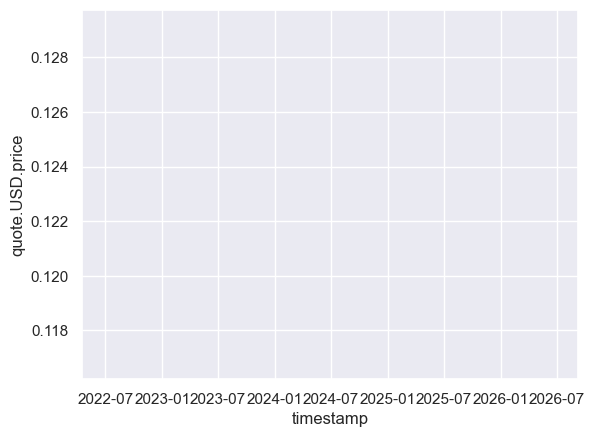

In [72]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)